# Sandbox
### For data exploration and other operations not part of the central workflow

So far, there are two things being analyzed here:
1. The number of occurences by year per group of the abortion replacements. This is for quick confirmation of correctness (check that number of total occurences doesn't change by group, etc) as well as determining the maximum min_count threshold that still results enough years included (no giant leaps). I've taken the liberty to visualize these years, so that the jumps can be immediately seen. 

2. Review the number of replacements made per each sub-regex, and view the total number of replacements. It should be ~27,000. 

In [105]:
import re
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

In [167]:
# counting number of replaced words for all groups and for all party in all years. 
l_count, c_count, n_count = [],[],[] 
# each is a list of lists, len(l_count) = number of groups, len(l_count[n]) = number of available years for group n 

for group in range(1,7):
    file = open('../corpora/corpus_abort_{}.txt'.format(group), 'r')
    text_abort = file.read()
    file.close()
    l_c, c_c, n_c = [],[],[] # lists of mentions for a specified group
    for year in tqdm(range(int(1901/group)*group, 2020, group)):
        l_c.append(text_abort.count("abort_{}_Liberal".format(year)))
        c_c.append(text_abort.count("abort_{}_Conservative".format(year)))
        n_c.append(text_abort.count("abort_{}_NDP".format(year)))
    l_count.append(l_c)
    c_count.append(c_c)
    n_count.append(n_c)


100%|██████████| 21/21 [00:42<00:00,  2.02s/it]


46 26 20 14 12 11 

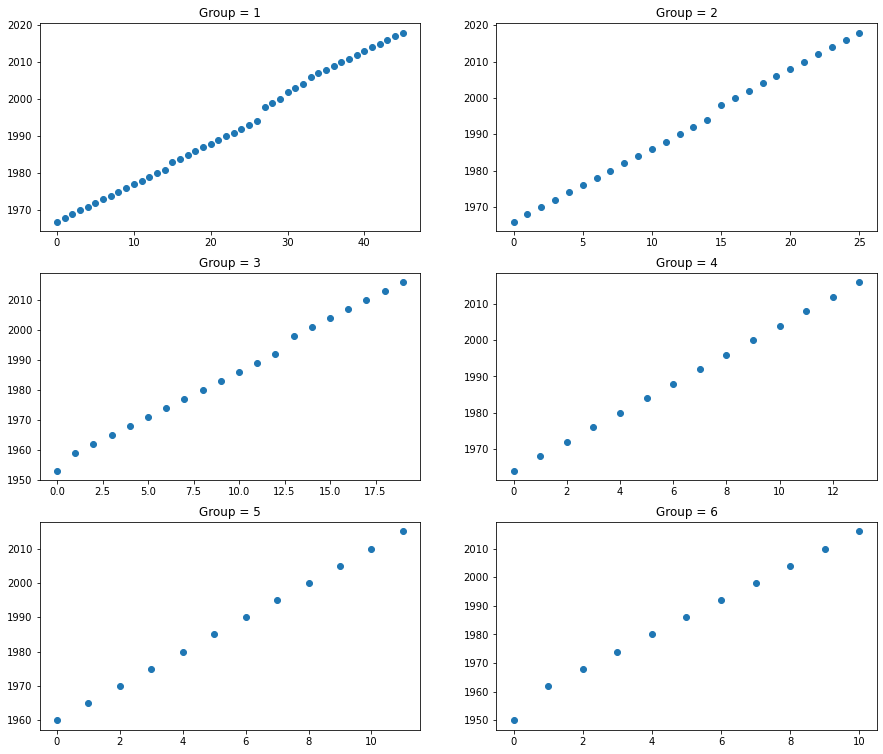

In [181]:
th =[10,15,15,30,30,30]  # maximum thresholds for groups: 10 for 1, 15 for 2, 20 for 3, 30 for 4, 50 for 5 & 6.
fig, axs = plt.subplots(3,2,figsize=(15, 13)) 
# Finding number of years where NDP, Liberals, and Conservatives both had mentions of abortion above thresholds. 
for group in range(0,6):
    common = [list(range(int(1901/(group+1))*(group+1), 2020, group+1))[i] for i in range(len(n_count[group])) \
              if (l_count[group][i] > th[group] and c_count[group][i] > th[group] and n_count[group][i] > th[group])]
    print(len(common),"", end="") # printing number of common years 
    axs[int(group/2),group%2].plot(common, 'o')
    axs[int(group/2),group%2].set_title(f'Group = {group+1}', fontsize='large')
plt.show()

# the smoother the better - less gaps! 

In [180]:
file = open('../corpora/corpus_abort_1.txt', 'r')
all_text = file.read()
file.close()

In [104]:
collect = [r"abortion[s]?\b", r"preborns?\b", r"unborns?\b", r"fo?etus(es)?\b", 
           r"wom[ea]ns?\srights?\b", r"right\s(choose|life)\b", r"freedom\schoice\b",
           r"prolife\b", r"prochoice\b", r"womens?\shealth\b", r"reproductive\s(health|rights?)\b"]
test = "|".join(collect)
regex = re.compile(test)
counts = []
for i in tqdm(collect):
    counts.append(len(re.findall(i, all_text)))

print("All counts:\n", counts, "\nTotal Replacements:\n", sum(counts))
# For reference, this list is (womens rights, abortion, preborn, unborn, foetus, 
# right to choose/life, freedom of choice, prolife, prochoice, womens health, reproductive health/rights)

100%|██████████| 11/11 [00:30<00:00,  2.74s/it]

All counts:
 [15108, 231, 3025, 1925, 2611, 1799, 1148, 510, 312, 448, 361] 
Total Replacements:
 27478
